In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from dataset import Dataset
from model import Model

dataset = Dataset(scale=1.0)
model = Model()
model.load("saved")

loaded: saved


In [3]:
bar_images_short = dataset.get_bar_images(is_short=True)
bar_images_long  = dataset.get_bar_images(is_short=False)

start_pos = 32
end_pos   = 64

rs_short, r_tds_short, rh_short, error_tds_short = model.apply_images(bar_images_short, training=False)
r_short         = rs_short[start_pos:end_pos]
r_td_short      = r_tds_short[start_pos:end_pos]
error_tds_short = error_tds_short[start_pos:end_pos]

rs_long, r_tds_long, rh_long, error_tds_long = model.apply_images(bar_images_long, training=False)
r_long          = rs_long[start_pos:end_pos]
r_td_long       = r_tds_long[start_pos:end_pos]
error_tds_long  = error_tds_long[start_pos:end_pos]

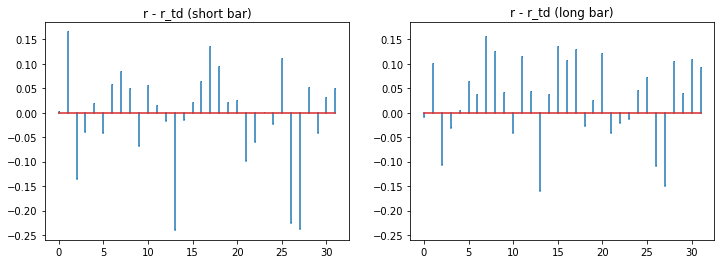

In [4]:
max_value = np.max([np.max(error_tds_long), np.max(error_tds_short)])
min_value = np.min([np.min(error_tds_long), np.min(error_tds_short)])
mid_value = (max_value + min_value) / 2
value_range = max_value - min_value

plt.figure(figsize=(12, 4)) # figureの縦横の大きさ

plt.subplot(1,2,1)
plt.title("r - r_td (short bar)")
plt.ylim([mid_value - (value_range/2) * 1.1, mid_value + (value_range/2) * 1.1])
plt.stem(list(range(len(error_tds_short))), error_tds_short, label='short',
        markerfmt=',')

plt.subplot(1,2,2)
plt.title("r - r_td (long bar)")
plt.ylim([mid_value - (value_range/2) * 1.1, mid_value + (value_range/2) * 1.1])
plt.stem(list(range(len(error_tds_long))), error_tds_long, label='long',
        markerfmt=',')
plt.show()

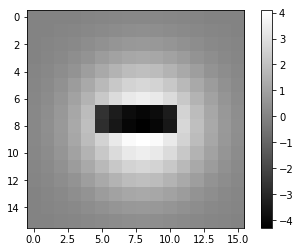

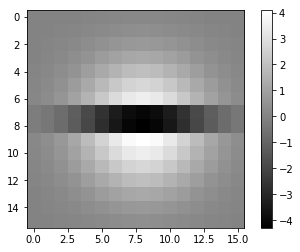

In [5]:
bar_images_short = dataset.get_bar_images(is_short=True)
bar_images_long  = dataset.get_bar_images(is_short=False)

plt.figure()
plt.imshow(bar_images_short[1].reshape([16,16]), cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(bar_images_long[1].reshape([16,16]), cmap='gray')
plt.colorbar()
plt.show()

## Reconstruct from level1

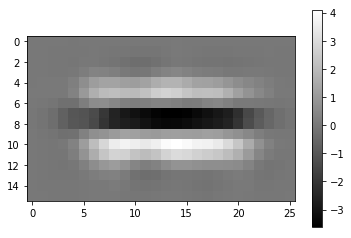

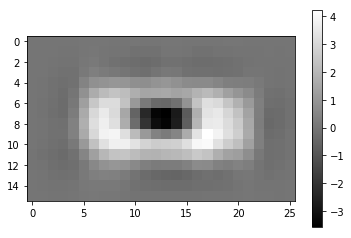

In [6]:
patch1_long = model.reconstruct(rs_long, level=1)
plt.figure()
plt.imshow(patch1_long, cmap='gray')
plt.colorbar()
plt.show()

patch1_short = model.reconstruct(rs_short, level=1)
plt.figure()
plt.imshow(patch1_short, cmap='gray')
plt.colorbar()
plt.show()

## Reconstruct from level2

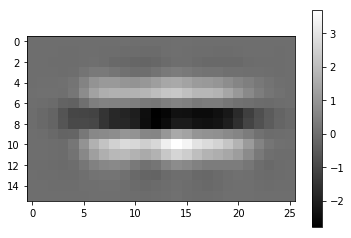

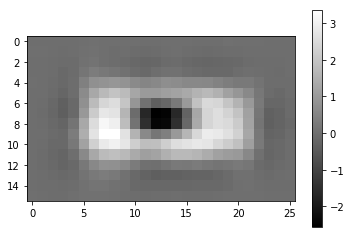

In [7]:
patch2_long = model.reconstruct(rh_long, level=2)
plt.figure()
plt.imshow(patch2_long, cmap='gray')
plt.colorbar()
plt.show()

patch2_short = model.reconstruct(rh_short, level=2)
plt.figure()
plt.imshow(patch2_short, cmap='gray')
plt.colorbar()
plt.show()